In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
from calendar import month_name as mn
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from datetime import datetime
from datetime import timedelta

In [51]:
natgas_df = pd.read_csv('Nat_Gas.csv')
natgas_df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


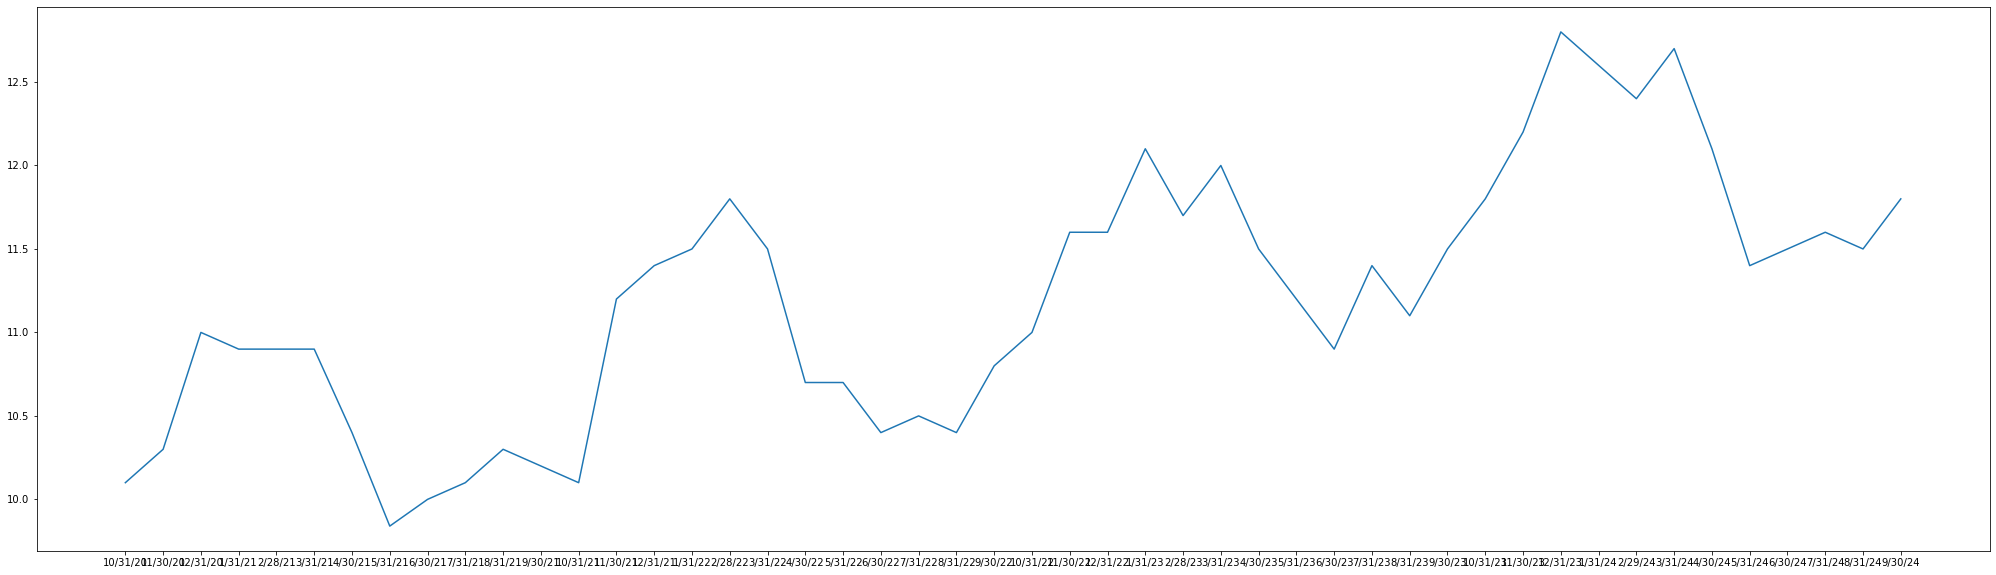

In [52]:
plt.figure(figsize=(35,10))
plt.plot(natgas_df['Dates'],natgas_df['Prices'])

In [54]:
#Dates
natgas_df['Dates'] = pd.to_datetime(natgas_df['Dates'])


natgas_df['Year'] = natgas_df['Dates'].dt.year
natgas_df['Month'] = natgas_df['Dates'].dt.month

natgas_df.head()

#only Jan months
natgas_jan = natgas_df[natgas_df['Month'] == 1]
natgas_jan

,Dates,Prices,Year,Month
3,2021-01-31,10.9,2021,1
15,2022-01-31,11.5,2022,1
27,2023-01-31,12.1,2023,1
39,2024-01-31,12.6,2024,1


In [91]:
from sklearn.linear_model import LinearRegression

X = np.array(natgas_df[natgas_df['Month'] == 1]['Year']).reshape(-1,1)
y = np.array(natgas_df[natgas_df['Month'] == 1]['Prices'])

reg = LinearRegression().fit(X,y)
reg

LinearRegression()

In [92]:
round(float(reg.predict([[2025]])), 2)

13.2

In [93]:
#extrapolation for an extra year

def next_year_price(next_year):
    price_list = []
    for i in np.arange(12):
        X = np.array(natgas_df[natgas_df['Month'] == 1+i]['Year']).reshape(-1,1)
        y = np.array(natgas_df[natgas_df['Month'] == 1+i]['Prices'])
        
        reg = LinearRegression().fit(X,y)
        price = reg.predict([[next_year]])
        price_list.append(round(float(price),2))
        
        

    return price_list   
            

In [94]:
gas_price25 = next_year_price(2025)
np.array(gas_price25)

array([13.2 , 12.8 , 13.25, 12.65, 12.08, 11.95, 12.25, 11.9 , 12.45,
       12.85, 13.46, 13.66])

In [100]:
def get_last_of_each_month(year):
    dates_array = []
    current_date = datetime(year, 12, 31) # Start from the last day of the year
    while current_date.year == year:
        
        dates_array.append(current_date.strftime('%Y-%m-%d'))
        month = current_date.month
        year = current_date.year
        
        #Move to the first day of the previous month 
        current_date = current_date.replace(year=year, month = month, day=1)
        
        #Move back one day to get the last day of the current month 
        current_date -= timedelta(days=1)
        
    return dates_array[::-1] # Reverse the array to get the dates in asceding order


In [101]:
dates_2025 = get_last_of_each_month(2025)
dates_2025

['2025-01-31',
 '2025-02-28',
 '2025-03-31',
 '2025-04-30',
 '2025-05-31',
 '2025-06-30',
 '2025-07-31',
 '2025-08-31',
 '2025-09-30',
 '2025-10-31',
 '2025-11-30',
 '2025-12-31']

In [104]:
# New dataframe of 2025 dates and prices 

projected_gas_prices25_df = pd.DataFrame({'Dates': dates_2025, 'Prices': gas_price25})
projected_gas_prices25_df

projected_gas_prices25_df['Dates'] = pd.to_datetime(projected_gas_prices25_df['Dates'])
projected_gas_prices25_df['Year'] = projected_gas_prices25_df['Dates'].dt.year
projected_gas_prices25_df['Month'] = projected_gas_prices25_df['Dates'].dt.month

In [106]:
gas_df = pd.concat([natgas_df, projected_gas_prices25_df], ignore_index=True)
gas_df

,Dates,Prices,Year,Month
0,2020-10-31,10.10,2020,10
1,2020-11-30,10.30,2020,11
2,2020-12-31,11.00,2020,12
3,2021-01-31,10.90,2021,1
4,2021-02-28,10.90,2021,2
5,2021-03-31,10.90,2021,3
6,2021-04-30,10.40,2021,4
7,2021-05-31,9.84,2021,5
8,2021-06-30,10.00,2021,6
9,2021-07-31,10.10,2021,7


In [107]:
def get_gas_price(month, year):
    print(gas_df[(gas_df['Year'] == year) & (gas_df['Month'] == month)]['Prices'])
    

In [108]:
get_gas_price(10,2025)

57    12.85
Name: Prices, dtype: float64


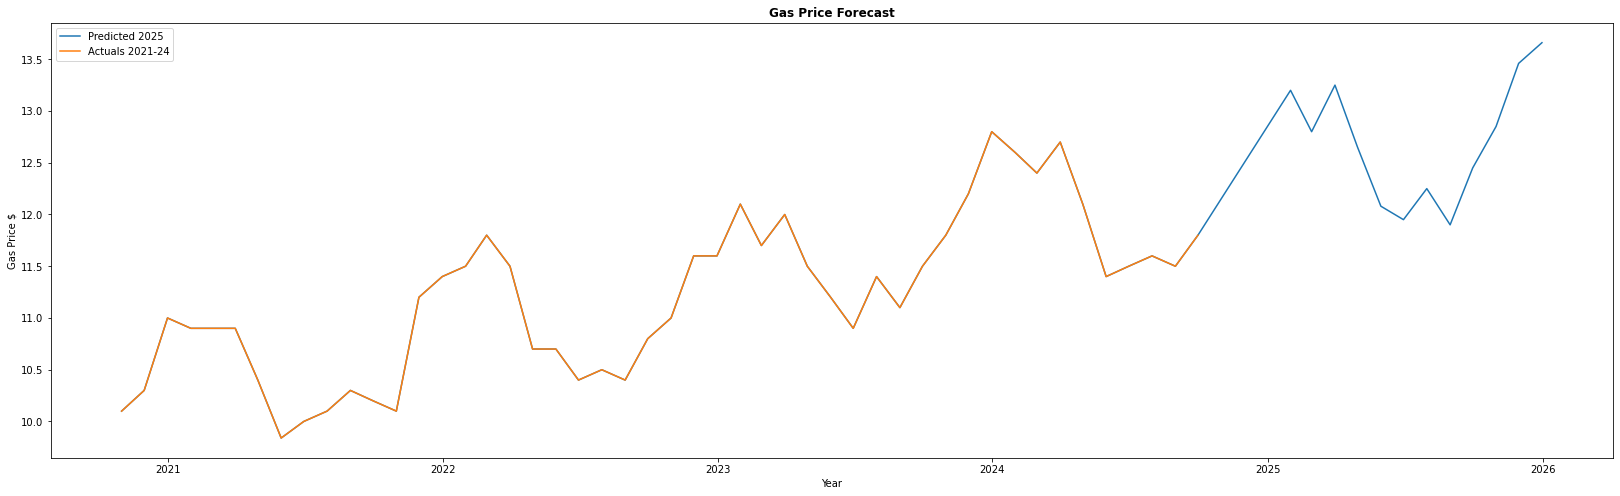

In [112]:
#final analysis 
plt.figure(figsize=(28,8))

plt.plot(gas_df['Dates'], gas_df['Prices'], label = 'Predicted 2025')
plt.plot(natgas_df['Dates'], natgas_df['Prices'], label = 'Actuals 2021-24')
plt.ylabel('Gas Price $')
plt.xlabel('Year')
plt.title('Gas Price Forecast', fontweight = 'bold')
plt.legend()

In [22]:
#complicated approch

def linear_sin_model(x, a, b, c, d,e, f):
    return a * x + b + d * np.sin(2 * np.pi * (e * x + f)) + c

def fit_gas_price(dates, prices):
    # Normalize the dates to start from 0
    start_date = min(dates)
    normalized_dates = np.array(dates) - start_date
    
    #Perform curve fitting to obtain the model coefficients
    coeffs, _ = curve_fit(linear_sin_model, normalized_dates, prices)
    
    #Unpack the coefficients
    a, b, c, d, e, f = coeffs
    
    #create and return the prediction function
    def predict_gas_price(date):
        #normalize the input date 
        normalized_date = date - start_date
        
        #Use the model to predict gas price for the given date
        return linear_sin_model(normalized_date, a, b, c, d, e, f)
    
    return predict_gas_price
        

In [24]:
predict_gas_price(12)

10.62343890781591

In [28]:
#Gas price data
dates = np.arange(48) #Monthly dates index
gas_prices = natgas_df['Prices'] # Corresponding montly gas prices

#Fit the data and obtain the prediction function
predict_gas_price = fit_gas_price(dates, gas_prices)

specific_date = 57
predicted_price = predict_gas_price(specific_date)
print("Predicted gas price for the specific date:", predicted_price)



Predicted gas price for the specific date: 12.042003104819273


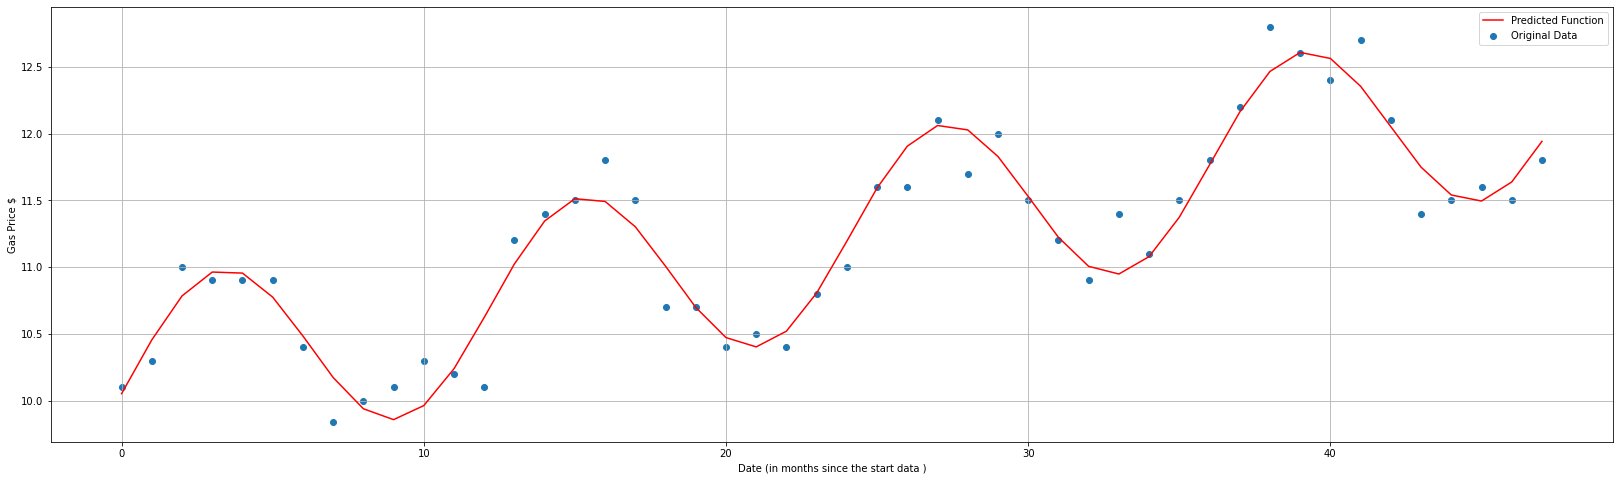

In [113]:
#Plot the original data and the predicted function
plt.figure(figsize=(28,8))

plt.scatter(dates, gas_prices, label='Original Data')
plt.plot(dates, predict_gas_price(np.array(dates)), color='red', label='Predicted Function')
plt.xlabel('Date (in months since the start data )')
plt.ylabel('Gas Price $')
plt.legend()
plt.grid(True)
plt.show()